# Pharmaceuticals analysis
For this analysis, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how the treatments compare according to to the following:
* The most important drugs are Capomulin, Infubinol, Ketapril, and Placebo
* to show how the tumor volume changes over time for each treatment.
* to show how the number of metastatic (cancer spreading) sites changes over time for each treatment.
* to show the number of mice still alive through the course of treatment (Survival Rate)
* to compare the total % tumor volume change for each of the most important drugs across the full 45 days.

In [31]:
#Import the neccesary libraries 
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn 
from scipy.stats import sem 

# Hide Warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [32]:
#Load the data
mouse_drug = pd.read_csv("mouse_drug_data.csv")
clinical_trial = pd.read_csv("clinicaltrial_data.csv")
#Merge both datasets into a new dataset 
dataset = pd.merge(mouse_drug, clinical_trial, on="Mouse ID", how="outer")

In [33]:
dataset.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [34]:
#Get the info from the merged dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1906 non-null   object 
 1   Drug                1906 non-null   object 
 2   Timepoint           1906 non-null   int64  
 3   Tumor Volume (mm3)  1906 non-null   float64
 4   Metastatic Sites    1906 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


## Tumor Response to Treatment

In [35]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#Group the dataset into Drug and Timepoint
grouped_dt = dataset.groupby(['Drug','Timepoint'])

#Get the menas from each drug
mean_tumor_volume = grouped_dt['Tumor Volume (mm3)'].mean()

#Save the means into a new dataframe
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume).reset_index()
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [36]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

#Store the standard deviations of each drug
std_tumor_volume = grouped_dt['Tumor Volume (mm3)'].std()

#Save the standard deviations into a new dataframe
std_tumor_volume_df = pd.DataFrame(std_tumor_volume).reset_index()

In [37]:
# Create a dataframe wich contains a column for each drug storing the estandar error of "Tumor Volume"
#Pivot the standard deviation dataframe 
pivot_std = std_tumor_volume_df.pivot(index = 'Timepoint', columns='Drug', values='Tumor Volume (mm3)')
pivot_std.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.242964,0.753856,1.175512,1.270025,0.970606,1.068422,1.158540,2.414777,1.199312,0.925664
10,3.513422,1.056070,1.293872,1.676454,1.463744,1.969702,1.804167,3.528366,2.079848,1.238033
15,4.108369,1.447385,1.639210,2.529329,2.036395,2.747955,1.921818,3.774331,2.365597,1.698048
20,4.362915,1.525155,2.129674,3.166670,2.662084,3.659772,2.289070,3.770480,2.849853,2.198367
25,4.135268,1.864031,2.334787,3.292768,3.452264,4.266887,2.160438,3.582445,3.233965,2.410052
30,4.383004,1.962481,2.601931,3.963139,3.778081,4.718189,2.689902,4.147942,3.816460,3.098552
35,4.935447,2.590153,3.409213,4.650315,3.926309,4.817311,3.430847,4.433337,4.012745,3.297993
40,5.607278,2.650983,3.336898,4.486653,4.332193,4.748016,4.694337,5.046561,4.885891,3.736102


In [38]:
# Create a dataframe wich contains a column for each drug storing the mean of "Tumor Volume"
#Do the same with the mean dataframe 
mean_pivot = mean_tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


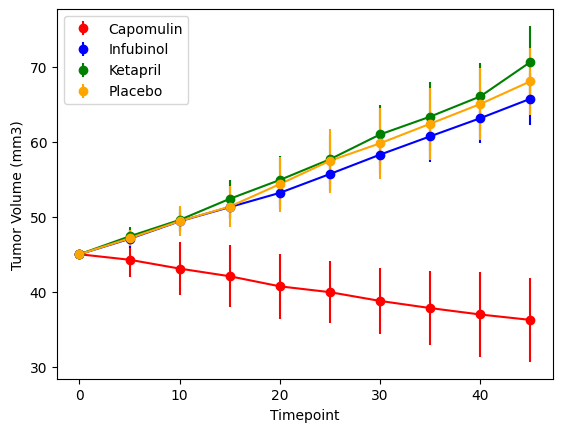

In [39]:
#Depict the tumor volume over time for the main four treatments and its standard error
#Save the values of the mean pivot df
mean_pivot_values = mean_pivot.values
#Do the same for the std pivot df
pivot_std_values = pivot_std.values

#Make a list of the drugs you want to check
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

#Create a color list so they are the same color the line plot to the errors 
colors = ['red', 'blue', 'green', 'orange']

#Tell the code of the indexes are the timepoints
timepoints= mean_pivot.index

#Create the plot 
for i, drug in enumerate(drugs):
    plt.errorbar(timepoints, mean_pivot[drug], yerr = pivot_std[drug], fmt='o', label = drug, color=colors[i])
    plt.plot(timepoints, mean_pivot[drug], '-', label='_nolegend_', color= colors[i])

plt.legend()
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

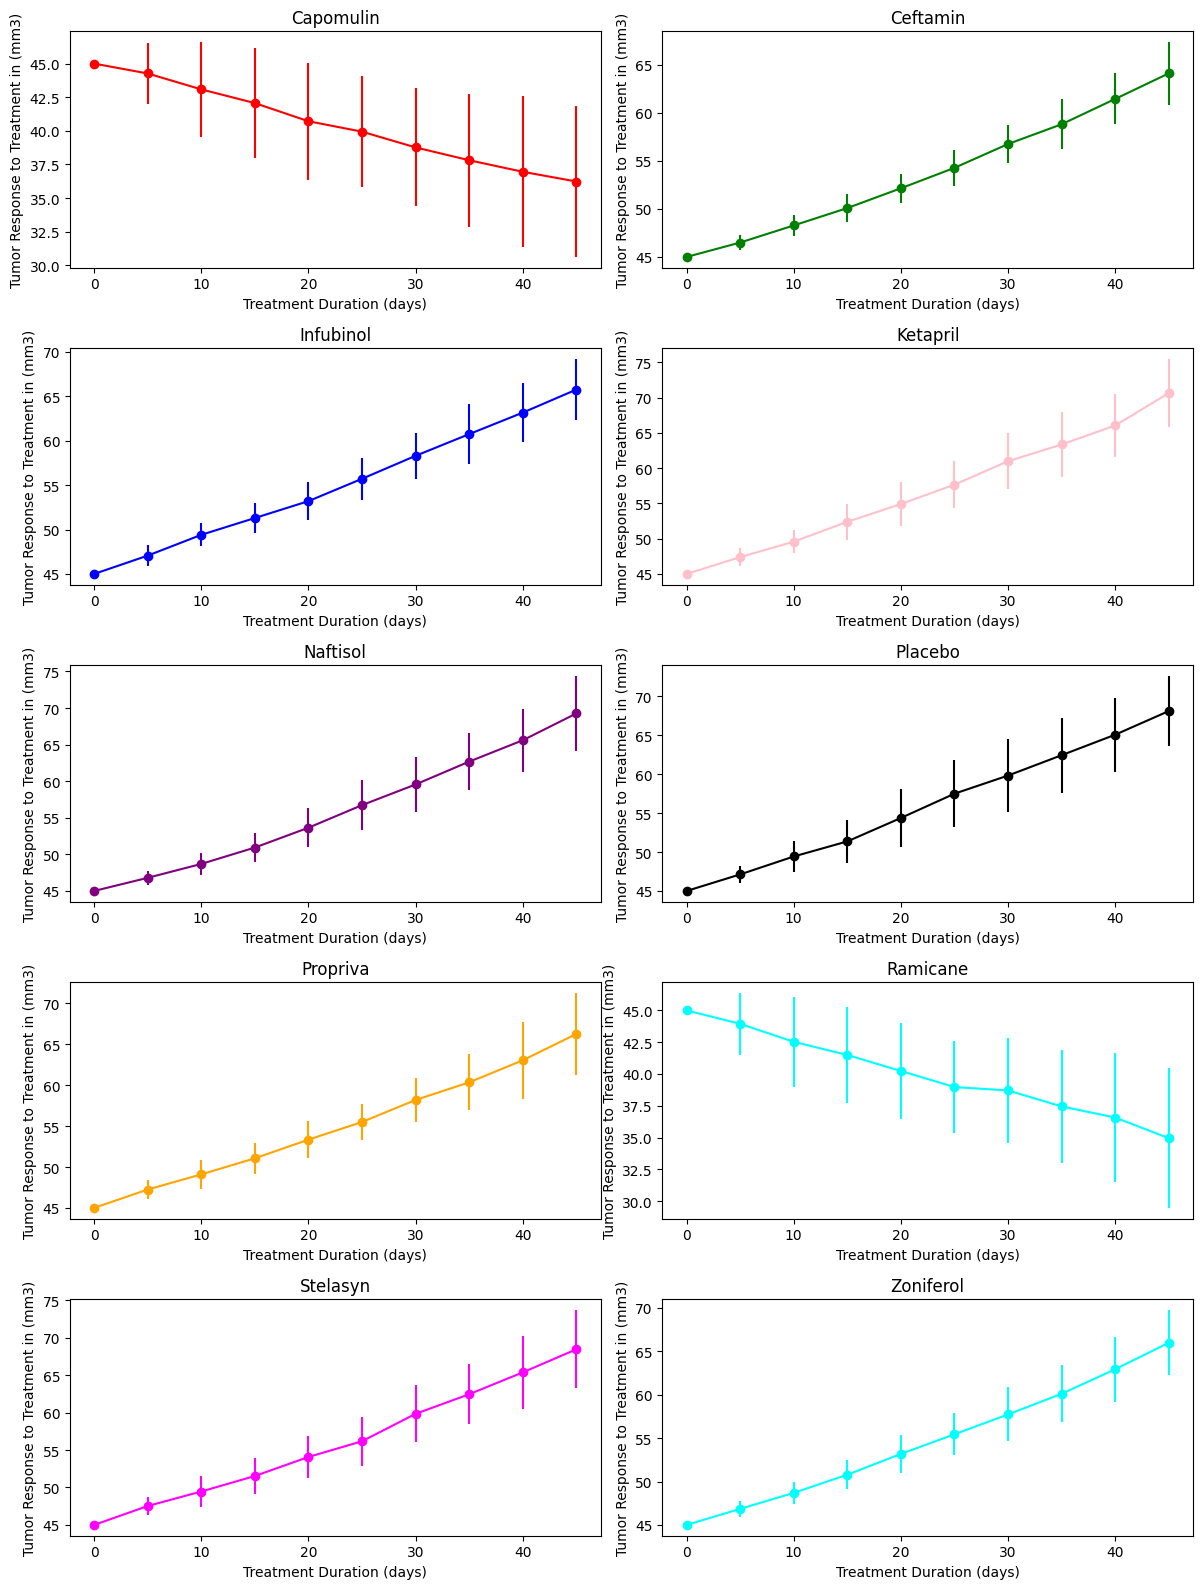

In [40]:
#Depict the tumor volume over time by treatment type and its standard error

#Define the list of drugs to plot
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

#Define the colors to use
colors = ["red", "green", "blue", "pink", "purple", "black", "orange", "cyan", "magenta", "aqua"]
    
#Define the number of rows and columns for the subplot grid
num_rows = 5
num_cols = 2

# Create the new figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,16))

#Flatten the array of axes for easier indexing
axes = axes.flatten()

# Loop through each drug and plot the data in a separate subplot
for i, drug in enumerate(drugs):
    #Get the data for this drug from the mean_pivot and pivot_std dataframes
    data = mean_pivot[drug]
    errors = pivot_std[drug]

    # Determine the row and column for this subplot
    row = i // num_cols
    col = i % num_cols

    #Plot data and set the subplot title
    axes[i].errorbar(data.index, data.values, yerr=errors.values, fmt='o', color = colors[i])
    axes[i].plot(data.index, data.values, '-', label='_nolegend_', color= colors[i])
    axes[i].set_title(drug)
    axes[i].set_xlabel('Treatment Duration (days)')
    axes[i].set_ylabel('Tumor Response to Treatment in (mm3)')
#Remove any unused subplots from the figure
for i in range(len(drugs), num_rows * num_cols):
    fig.delaxes(axes[i])



# Adjust the spacing between subplots and display the figure
fig.tight_layout()
plt.show()

## Metastatic Response to Treatment

In [41]:
# Store the the number of metastatic sites Data Grouped by Drug and Timepoint
#Group the dataset by drug and timepoint
grouped_metastatic = dataset.groupby(['Drug','Timepoint'])
#Take the mean out of every metastatic site by drug
mean_metastatic = grouped_metastatic['Metastatic Sites'].mean()
#Generate new Dataframe
mean_metastatic_df = pd.DataFrame(mean_metastatic).reset_index()
mean_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [42]:
# Store the Standard Error of the number of metastatic sites Grouped by Drug and Timepoint
#Take the std out of the grouped dataset
std_metastatic = grouped_metastatic['Metastatic Sites'].std()
std_metastatic_df = pd.DataFrame(std_metastatic).reset_index()
std_metastatic_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.374166
2,Capomulin,10,0.627163
3,Capomulin,15,0.646899
4,Capomulin,20,0.775107
...,...,...,...
95,Zoniferol,25,0.946485
96,Zoniferol,30,0.961150
97,Zoniferol,35,1.069045
98,Zoniferol,40,1.121714


In [43]:
# Create a dataframe wich contains a column for each drug storing the number of "Metastatic Sites"
mean_metastatic_pivot = mean_metastatic_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
mean_metastatic_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [44]:
# Create a dataframe wich contains a column for each drug storing the estandar error of "Metastatic Sites"
std_metastatic_pivot = std_metastatic_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
std_metastatic_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.374166,0.497613,0.458258,0.470472,0.448978,0.494535,0.476095,0.331662,0.435890,0.380693
10,0.627163,0.680557,0.730297,0.666125,0.749603,0.564660,0.506870,0.442326,0.593109,0.511766
15,0.646899,0.787327,0.889087,0.834210,0.727029,0.850696,0.562296,0.564660,0.735868,0.511766
20,0.775107,1.022620,1.050063,1.031662,0.812728,1.020263,0.707107,0.572768,0.920662,0.685994
25,0.852803,1.098127,1.127494,1.256562,0.785905,1.088037,0.744946,0.572768,0.958190,0.946485
30,0.811177,0.997914,0.939336,1.474179,1.032796,1.162919,0.960769,0.671262,0.978528,0.961150
35,0.795006,0.997249,0.778499,1.490164,1.279881,1.277446,1.159502,0.669043,0.963933,1.069045
40,0.804748,1.081818,0.994429,1.222799,1.245946,1.029857,1.301708,0.718185,1.083625,1.121714


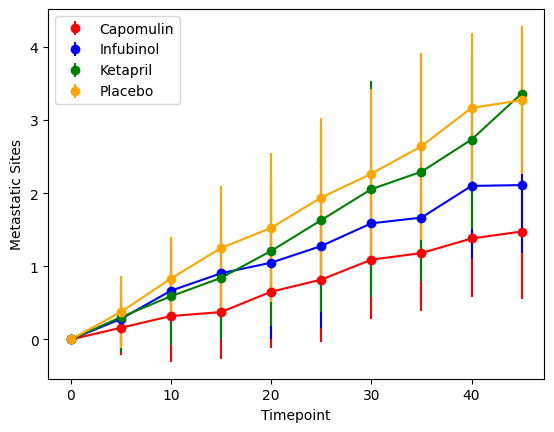

In [45]:
#Depict the number of metastatic sites over time for the main four treatments and its standard error
#Save the values of the mean pivot df
mean_metastatic_pivot_values = mean_metastatic_pivot.values
#Do the same for the std pivot df
std_metastatic_pivot_values = std_metastatic_pivot.values

#Make a list of the drugs you want to check
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

#Create a color list so they are the same color the line plot to the errors 
colors = ['red', 'blue', 'green', 'orange']

#Tell the code of the indexes are the timepoints
timepoints= mean_metastatic_pivot.index

#Create the plot 
for i, drug in enumerate(drugs):
    plt.errorbar(timepoints, mean_metastatic_pivot[drug], yerr = std_metastatic_pivot[drug], fmt='o', label = drug, color=colors[i])
    plt.plot(timepoints, mean_metastatic_pivot[drug], '-', label='_nolegend_', color= colors[i])

plt.legend()
plt.xlabel('Timepoint')
plt.ylabel('Metastatic Sites')

plt.show()

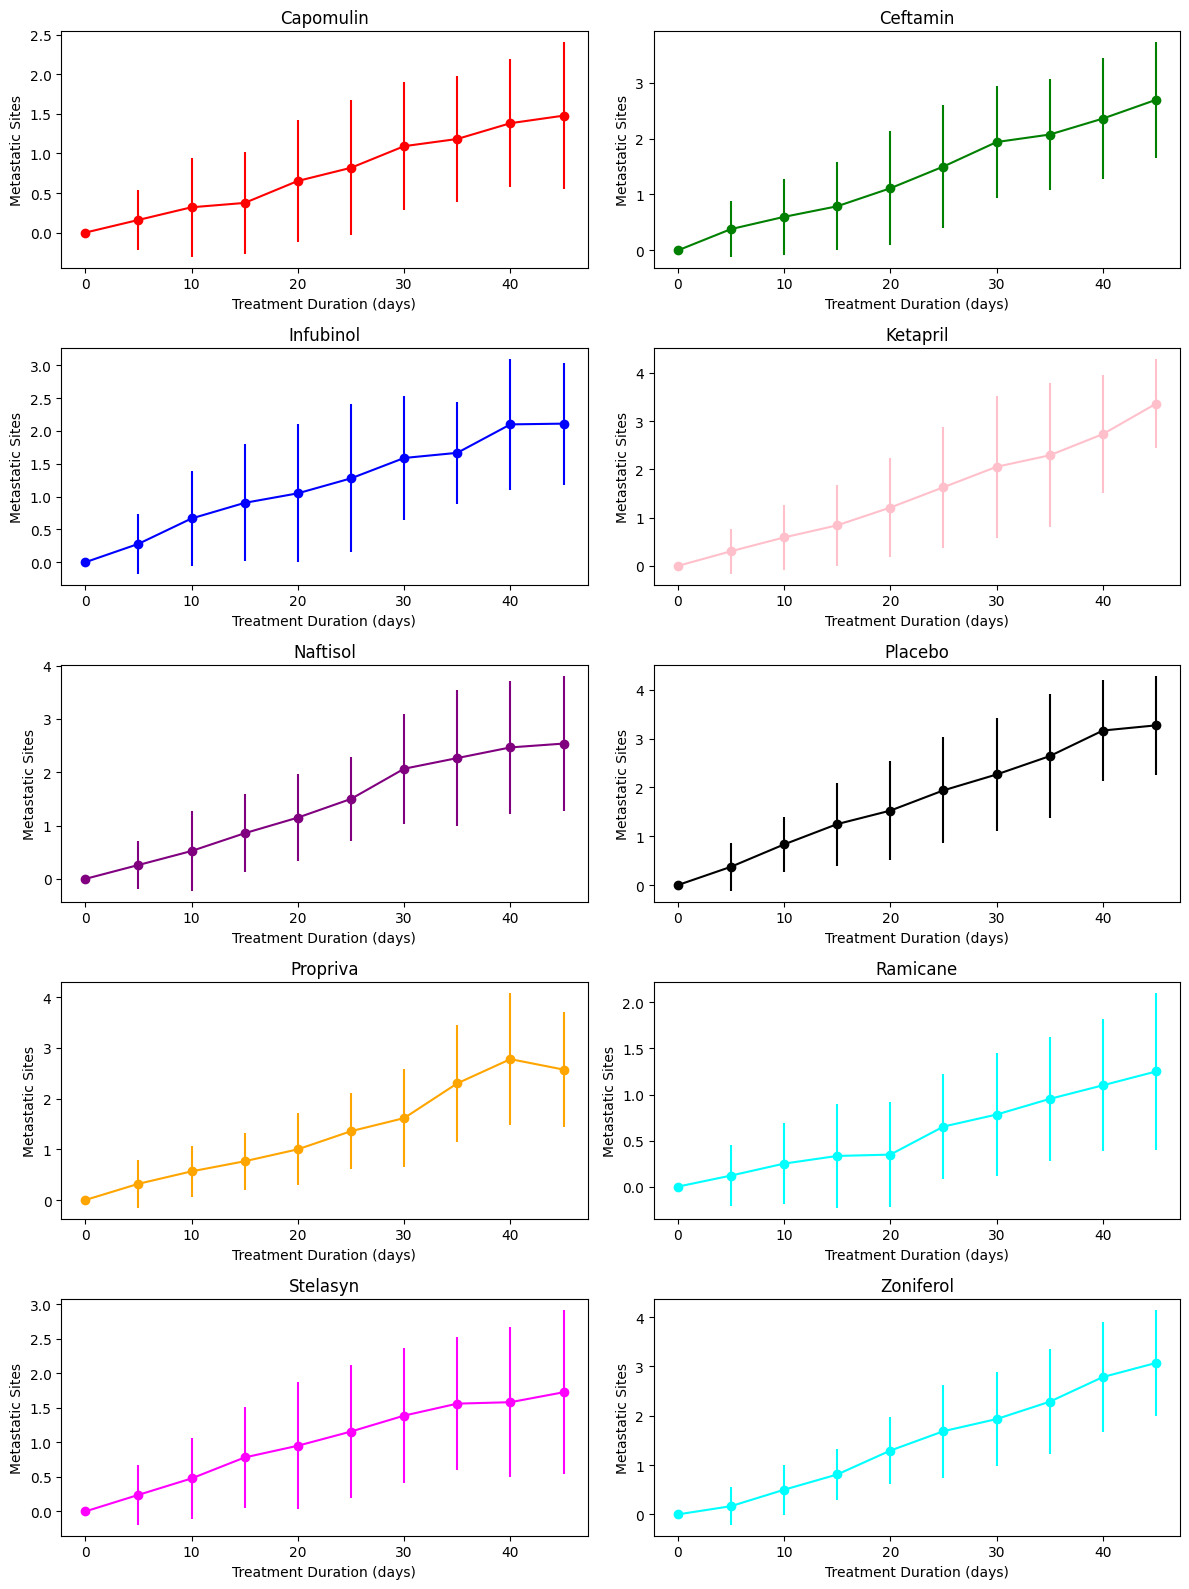

In [46]:
#Depict the number of metastatic sites over time by treatment type and its standard error
#Define the list of drugs to plot
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

#Define the colors to use
colors = ["red", "green", "blue", "pink", "purple", "black", "orange", "cyan", "magenta", "aqua"]
    
#Define the number of rows and columns for the subplot grid
num_rows = 5
num_cols = 2

# Create the new figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12,16))

#Flatten the array of axes for easier indexing
axes = axes.flatten()

# Loop through each drug and plot the data in a separate subplot
for i, drug in enumerate(drugs):
    #Get the data for this drug from the mean_pivot and pivot_std dataframes
    data = mean_metastatic_pivot[drug]
    errors = std_metastatic_pivot[drug]

    # Determine the row and column for this subplot
    row = i // num_cols
    col = i % num_cols

    #Plot data and set the subplot title
    axes[i].errorbar(data.index, data.values, yerr=errors.values, fmt='o', color = colors[i])
    axes[i].plot(data.index, data.values, '-', label='_nolegend_', color= colors[i])
    axes[i].set_title(drug)
    axes[i].set_xlabel('Treatment Duration (days)')
    axes[i].set_ylabel('Metastatic Sites')
#Remove any unused subplots from the figure
for i in range(len(drugs), num_rows * num_cols):
    fig.delaxes(axes[i])



# Adjust the spacing between subplots and display the figure
fig.tight_layout()
plt.show()

## Survival Rates

In [47]:
# Store the number of mice Data Grouped by Drug and Timepoint 
mouse_count = grouped_metastatic['Mouse ID'].count()
mouse_count_df = pd.DataFrame(mouse_count).reset_index()
mouse_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [48]:
# Create a dataframe wich contains a column for each drug storing the number of mice 
mouse_count_pivot = mouse_count_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
mouse_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [49]:
# Calculate a new dataframe which stores the survival rate of the mice per treatmen by timepoint 
survival_rate_df = mouse_count_pivot.apply(lambda x: (x/x.iloc[0])*100)
survival_rate_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


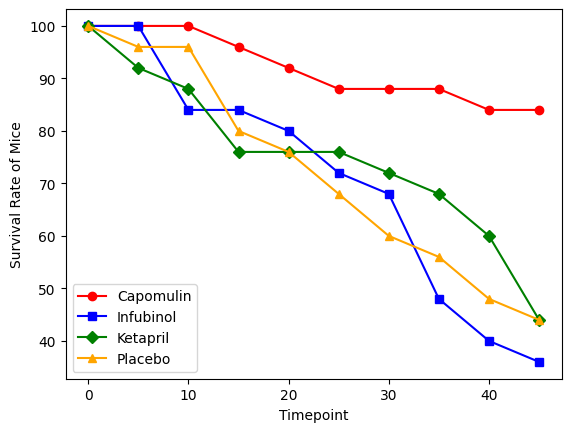

In [50]:
#Depict the survival rate over time for the most important treatments
#Save the values of the mean pivot df
survival_rate_values = survival_rate_df.values

#Make a list of the drugs you want to check
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

#Create a color list so they are the same color the line plot to the errors 
colors = ['red', 'blue', 'green', 'orange']

#Create a list of markers
markers = ['o', 's', 'D', '^']

#Tell the code of the indexes are the timepoints
timepoints= survival_rate_df.index

#Create the plot 
for i, drug in enumerate(drugs):
    plt.plot(timepoints, survival_rate_df[drug], '-', label=drug, marker = markers[i], color= colors[i])

plt.legend()
plt.xlabel('Timepoint')
plt.ylabel('Survival Rate of Mice')

plt.show()

## Summary Bar Graph

In [51]:
# Calculate the volume change in percent for the main treatments

#Create a new dataframe with the initial and final tumor volumes for each mouse and drug
tumor_volumes = dataset.groupby(['Drug', 'Mouse ID'])['Tumor Volume (mm3)'].agg(['first', 'last']).reset_index()

#Calculate the percentage change in tumor volume for each mouse and drug
tumor_volumes['Percent Change'] = (tumor_volumes['last'] - tumor_volumes['first']) / tumor_volumes['first'] * 100

#pivor the dataframe to have the drugs as the index and the percentage changes as the values
percent_change = tumor_volumes.pivot_table(index='Drug', values='Percent Change')

#Rename the column to 'Tumor Volume Percent Change'
percent_change.columns = ['Tumor Volume Percent Change']

percent_change

,Tumor Volume Percent Change
Drug,
Capomulin,-18.516516
Ceftamin,28.342171
Infubinol,30.442222
Ketapril,39.569314
Naftisol,36.012793
Placebo,34.463143
Propriva,26.082141
Ramicane,-19.574688
Stelasyn,35.698830


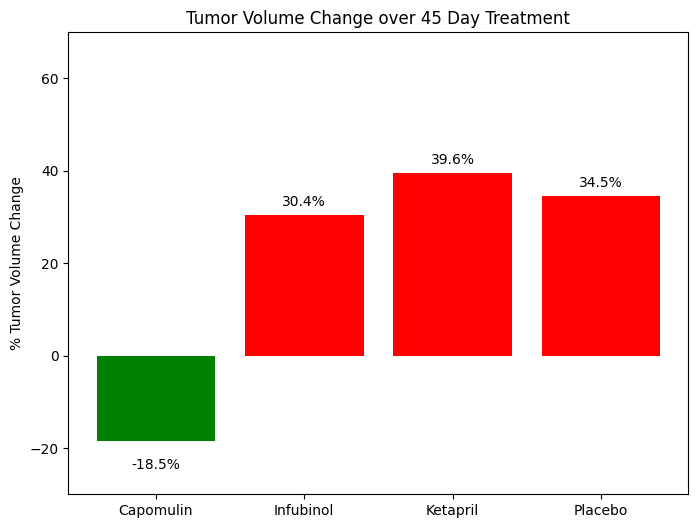

In [60]:
# Calculate the volume change in percent for the main treatments

#Create a list of the main drugs
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

#Filter the dataframe to only include the drugs we care about
percent_change_df = percent_change[percent_change.index.isin(drugs)]


# Set the figure size
plt.figure(figsize=(8, 6))

#Create the bar chart
plt.bar(percent_change_df.index, percent_change_df['Tumor Volume Percent Change'], color = ["green" if x < 0 else "red" for x in percent_change_df["Tumor Volume Percent Change"]])

#Set the labels and title
plt.title("Tumor Volume Change over 45 Day Treatment")
plt.ylabel('% Tumor Volume Change')
plt.ylim([-30, 70])

#Add the percentages to the top of each bar
for i, row in percent_change_df.iterrows():
    if row["Tumor Volume Percent Change"] > 0:
        plt.text(i, row["Tumor Volume Percent Change"] + 2, str(round(row["Tumor Volume Percent Change"], 1)) + "%", ha="center", color = "black")
    else:
        plt.text(i, row["Tumor Volume Percent Change"] - 6, str(round(row["Tumor Volume Percent Change"], 1)) + "%", ha="center", color = "black")


plt.show()

## Key takeaways:

### Tumor Response Treatment:
* Capomulin has the greatest response to the reduction of Tumor Volume of the 4 main treatments from 45% to 36% approximately 
* The two main treatments that reduce Tumor Volume is Capomulin and Ramicane

### Metastatic Response to Treatment
* Capomulin has the lowest generation of Metastatic Sites of the 4 main treatments
* Capomulin and Ramicane have the lowest numbers of Metastatic Siteswith an average of 1.5 Metastatic Sites , on the third place goes Stelasyn with 1.7 Metastatic Sites

### Survival Rates
* Capomulin has the most Survival Rate of the 4 main treatments with 90%
* It is the only treatment of the 4 main who has a reduction of Tumor Volume percent by -18.5%